# Import Block 

In [1]:
import geopandas as gpd

import os
from dotenv import load_dotenv

# Load Environment

In [2]:
load_dotenv(".env")

CNFDB_PATH = os.getenv("CNFDB_PATH")

# Read Data

In [3]:
# read fire data
fire_gdf = gpd.read_file(CNFDB_PATH)
fire_gdf = fire_gdf.to_crs("EPSG:4326")

# Data Exploration

Notes:
1. We have records of 59_539 fires of which 11_994 have no dates
2. 24 of 11_994 no date fires can be correct to granularity of month
3. 47_545 have REP_DATE and 25 of which are missing ACQ_DATE 


In [4]:
len(fire_gdf)

59539

In [5]:
fire_gdf.head(2)

,SRC_AGENCY,FIRE_ID,FIRENAME,YEAR,MONTH,DAY,REP_DATE,DATE_TYPE,OUT_DATE,DECADE,...,UNBURN_REM,MORE_INFO,POLY_DATE,CFS_REF_ID,CFS_NOTE1,CFS_NOTE2,AG_SRCFILE,ACQ_DATE,SRC_AGY2,geometry
0,BC,2004-C10175,None,2004,6,23,2004/06/23,Report date,0000/00/00,2000-2009,...,None,None,2007/05/17,BC-2004-C10175,None,None,H_FIRE_PLY,2011/06/10,BC,"POLYGON Z ((-124.6106 53.08084 0, -124.6099 53..."
1,BC,2004-C10176,None,2004,6,23,2004/06/23,Report date,0000/00/00,2000-2009,...,None,None,2007/05/17,BC-2004-C10176,None,None,H_FIRE_PLY,2011/06/10,BC,"POLYGON Z ((-124.48262 53.06162 0, -124.4815 5..."


In [6]:
# list columns
fire_gdf.columns

Index(['SRC_AGENCY', 'FIRE_ID', 'FIRENAME', 'YEAR', 'MONTH', 'DAY', 'REP_DATE',
       'DATE_TYPE', 'OUT_DATE', 'DECADE', 'SIZE_HA', 'CALC_HA', 'CAUSE',
       'MAP_SOURCE', 'SOURCE_KEY', 'MAP_METHOD', 'WATER_REM', 'UNBURN_REM',
       'MORE_INFO', 'POLY_DATE', 'CFS_REF_ID', 'CFS_NOTE1', 'CFS_NOTE2',
       'AG_SRCFILE', 'ACQ_DATE', 'SRC_AGY2', 'geometry'],
      dtype='object')

## REP_DATE Missing Value Issue Exploration

Note: some dates are set to "0000/00/00" in "REP_DATE" columns. This section is lokking to explote and try to mitigate the issue and find the actual date.

In [7]:
# filter data with no dates
no_date_fire = fire_gdf[fire_gdf['REP_DATE'] == "0000/00/00"]

In [8]:
# list count of dates
len(no_date_fire)

11994

In [9]:
no_date_fire['OUT_DATE'].value_counts()

OUT_DATE
0000/00/00    11990
1998/05/30        1
1998/06/28        1
2000/07/31        1
1899/12/30        1
Name: count, dtype: int64

<Axes: xlabel='YEAR'>

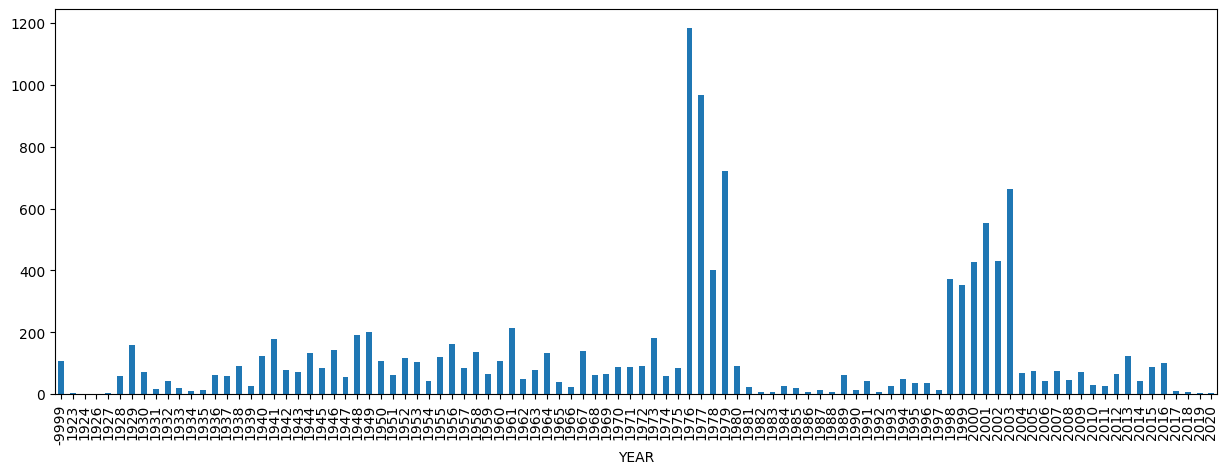

In [10]:
no_date_fire['YEAR'].value_counts().sort_index().plot(
    kind='bar',
    figsize=(15,5)
)

In [11]:
no_date_fire['MONTH'].value_counts()

MONTH
0     11970
5        13
8         4
4         2
10        2
9         1
7         1
6         1
Name: count, dtype: int64

In [12]:
no_date_fire['DAY'].value_counts()

DAY
0    11994
Name: count, dtype: int64

In [13]:
no_date_fire['CFS_NOTE1'].value_counts()

CFS_NOTE1
Missing attributes. SIZE_HA calculated by CFS                                           5643
Missing attributes                                                                       599
CFS dissolved by fire-id to produce multipart poly                                       232
Region: ZF                                                                               148
Region: CR                                                                               140
Fire year unknown, refer to decade                                                       107
included from PC-NA/NI                                                                    87
Region: VQ                                                                                82
Region: FS                                                                                71
Region: HY                                                                                33
Region: SM                                                  

Note: It would to recommended to discard the values that as the dat is not retrivable.

## ACQ_DATE Missing Value Issue Exploration

In [14]:
# get the missing value data
missing_acq_after_rep_date = fire_gdf[fire_gdf["REP_DATE"] != "0000/00/00"]
missing_acq_after_rep_date = missing_acq_after_rep_date[missing_acq_after_rep_date['ACQ_DATE'] == "0000/00/00"]

In [15]:
len(missing_acq_after_rep_date)

25

In [16]:
missing_acq_after_rep_date[['REP_DATE', 'CALC_HA']]

,REP_DATE,CALC_HA
56891,2008/06/13,1713.996364
56892,2008/06/13,19.560870
56893,2008/06/13,4.277159
56894,2008/06/13,4.130933
56895,2009/04/29,647.953157
56904,1991/05/21,56.528635
56905,1991/07/10,28.871413
56906,1991/05/16,4.370132
56907,1991/05/22,14.911022
56909,1992/06/12,504.875044


Note: 
- We can put the mssing values equla to REP_DATE since the size is so small
- This data is of no imprtance we can discard as well (i.e. discard the whole column)

## POLY_DATE Missing Value Issue Exploration

In [17]:
# get the missing value data
missing_poly_after_rep_date = fire_gdf[fire_gdf["REP_DATE"] != "0000/00/00"]
missing_poly_after_rep_date = missing_poly_after_rep_date[missing_poly_after_rep_date['POLY_DATE'] == "0000/00/00"]

In [18]:
len(missing_poly_after_rep_date)

20716

Note:

- The size of the missing value for the polygon aacqusition date is lage 
- Also the date of polygon is not of importance
- It would be tetter to discard this column